In [1]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the environment variables
load_dotenv('.env',override=True)

# =============================================================================
try:
    csv_file = r'Messy_HR_Dataset_Detailed.csv'
    df = pd.read_csv(csv_file)
except Exception as e:
    print(e)

In [2]:
print('*'*30,'\n')
print('Getting a sense of DF\n', df.head(), '\n')

****************************** 

Getting a sense of DF
    Unnamed: 0 FirstName LastName  StartDate ExitDate                    Title  \
0           0     Uriah  Bridges  20-Sep-19      NaN  Production Technician I   
1           1     Paula    Small  11-Feb-23      NaN  Production Technician I   
2           2    Edward     Buck  10-Dec-18      NaN       Area Sales Manager   
3           3   Michael  Riordan  21-Jun-21      NaN       Area Sales Manager   
4           4   Jasmine    Onque  29-Jun-19      NaN       Area Sales Manager   

        Supervisor                        ADEmail BusinessUnit EmployeeStatus  \
0     Peter Oneill    uriah.bridges@bilearner.com         CCDR         Active   
1  Renee Mccormick      paula.small@bilearner.com           EW         Active   
2   Crystal Walker      edward.buck@bilearner.com           PL         Active   
3   Rebekah Wright  michael.riordan@bilearner.com         CCDR         Active   
4        Jason Kim    jasmine.onque@bilearner.com   

In [3]:
print('*'*30,'\n')
print('Shape of DF: ', df.shape, '\n')

****************************** 

Shape of DF:  (3150, 39) 



In [4]:
print('*'*30,'\n')
print('DF Information: ', '\n')
df.info()
print('\n')

****************************** 

DF Information:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3150 non-null   int64  
 1   FirstName                   3150 non-null   object 
 2   LastName                    3150 non-null   object 
 3   StartDate                   3150 non-null   object 
 4   ExitDate                    1606 non-null   object 
 5   Title                       3150 non-null   object 
 6   Supervisor                  3150 non-null   object 
 7   ADEmail                     3150 non-null   object 
 8   BusinessUnit                3150 non-null   object 
 9   EmployeeStatus              3150 non-null   object 
 10  EmployeeType                3150 non-null   object 
 11  PayZone                     3150 non-null   object 
 12  EmployeeClassificationType  3150 non-n

In [5]:
print('*'*30,'\n')
print('DF Description: \n', df.describe(), '\n')

****************************** 

DF Description: 
         Unnamed: 0  LocationCode  Current Employee Rating  Employee ID  \
count  3150.000000   3150.000000              3150.000000  3150.000000   
mean   1495.748254  45155.332698                 2.968254  2502.748254   
std     867.007861  30019.418852                 1.020717   866.241991   
min       0.000000   1013.000000                 1.000000  1001.000000   
25%     746.000000  17616.500000                 2.000000  1750.250000   
50%    1495.500000  44455.500000                 3.000000  2504.500000   
75%    2246.750000  71713.250000                 3.000000  3254.750000   
max    2999.000000  98052.000000                 5.000000  4000.000000   

       Engagement Score  Satisfaction Score  Work-Life Balance Score  \
count       3150.000000         3150.000000              3150.000000   
mean           2.943492            3.021270                 2.992381   
std            1.430727            1.407413                 1.4092

In [6]:
col = df.columns.to_list()
print(col)
col_date = ['StartDate','ExitDate','DOB','Survey Date', 'Training Date']
for c in col_date:
    print('Column:', c)
    df[c] = pd.to_datetime(df[c],format='mixed')

print('*'*30,'\n')
print('DF Information: ', '\n')
df.info()
print('\n')

['Unnamed: 0', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus', 'EmployeeType', 'PayZone', 'EmployeeClassificationType', 'TerminationType', 'TerminationDescription', 'DepartmentType', 'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode', 'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score', 'Current Employee Rating', 'Employee ID', 'Survey Date', 'Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score', 'Training Date', 'Training Program Name', 'Training Type', 'Training Outcome', 'Location', 'Trainer', 'Training Duration(Days)', 'Training Cost']
Column: StartDate
Column: ExitDate
Column: DOB
Column: Survey Date
Column: Training Date
****************************** 

DF Information:  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                    

In [7]:
def turnNumeric(df,col):
    unique = {}
    for i,n in enumerate(df[col].unique()):
        unique[n] = i
    df[col] = df[col].apply(lambda x: unique[x])
    return df

In [8]:
df['Trainer'].unique

<bound method Series.unique of 0          Taylor Rodriguez
1       Kelly Patterson DDS
2             Taylor Thomas
3             Holly Elliott
4           Donald Martinez
               ...         
3145        Jeremy Townsend
3146          Jacob Johnson
3147          Debbie Arnold
3148          Shelby Fields
3149         Jennifer Lopez
Name: Trainer, Length: 3150, dtype: object>

In [9]:
df['Trainer'].nunique()

2942

In [10]:
df = turnNumeric(df,'Title')
df = turnNumeric(df,'EmployeeStatus')
df = turnNumeric(df,'Training Type')
df = turnNumeric(df,'Training Outcome')
df = turnNumeric(df,'Title')
df = turnNumeric(df,'BusinessUnit')
df = turnNumeric(df,'EmployeeStatus')
df = turnNumeric(df,'EmployeeType')
df = turnNumeric(df,'PayZone')
df = turnNumeric(df,'EmployeeClassificationType')
df = turnNumeric(df,'TerminationType')
df = turnNumeric(df,'DepartmentType')
df = turnNumeric(df,'Division')
df = turnNumeric(df,'State')
df = turnNumeric(df,'GenderCode')
df = turnNumeric(df,'RaceDesc')
df = turnNumeric(df,'MaritalDesc')
df = turnNumeric(df,'Performance Score')
df = turnNumeric(df,'Training Type')
df = turnNumeric(df,'Training Outcome')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  3150 non-null   int64         
 1   FirstName                   3150 non-null   object        
 2   LastName                    3150 non-null   object        
 3   StartDate                   3150 non-null   datetime64[ns]
 4   ExitDate                    1606 non-null   datetime64[ns]
 5   Title                       3150 non-null   int64         
 6   Supervisor                  3150 non-null   object        
 7   ADEmail                     3150 non-null   object        
 8   BusinessUnit                3150 non-null   int64         
 9   EmployeeStatus              3150 non-null   int64         
 10  EmployeeType                3150 non-null   int64         
 11  PayZone                     3150 non-null   int64       

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  3150 non-null   int64         
 1   FirstName                   3150 non-null   object        
 2   LastName                    3150 non-null   object        
 3   StartDate                   3150 non-null   datetime64[ns]
 4   ExitDate                    1606 non-null   datetime64[ns]
 5   Title                       3150 non-null   int64         
 6   Supervisor                  3150 non-null   object        
 7   ADEmail                     3150 non-null   object        
 8   BusinessUnit                3150 non-null   int64         
 9   EmployeeStatus              3150 non-null   int64         
 10  EmployeeType                3150 non-null   int64         
 11  PayZone                     3150 non-null   int64       

In [12]:
print(df.isna().sum())

Unnamed: 0                       0
FirstName                        0
LastName                         0
StartDate                        0
ExitDate                      1544
Title                            0
Supervisor                       0
ADEmail                          0
BusinessUnit                     0
EmployeeStatus                   0
EmployeeType                     0
PayZone                          0
EmployeeClassificationType       0
TerminationType                  0
TerminationDescription        1544
DepartmentType                   0
Division                         0
DOB                              0
State                            0
JobFunctionDescription           0
GenderCode                       0
LocationCode                     0
RaceDesc                         0
MaritalDesc                      0
Performance Score                0
Current Employee Rating          0
Employee ID                      0
Survey Date                      0
Engagement Score    

In [13]:
df['TerminationDescription']

0                                                 NaN
1                                                 NaN
2                                                 NaN
3                                                 NaN
4                                                 NaN
                            ...                      
3145    Increase town serious care support key heavy.
3146                                              NaN
3147                Opportunity upon apply and world.
3148                                              NaN
3149                                              NaN
Name: TerminationDescription, Length: 3150, dtype: object

In [14]:
df['StartDate']

0      2019-09-20
1      2023-02-11
2      2018-12-10
3      2021-06-21
4      2019-06-29
          ...    
3145   2018-10-22
3146   2019-09-17
3147   2021-04-20
3148   2021-08-21
3149   2020-06-28
Name: StartDate, Length: 3150, dtype: datetime64[ns]

In [15]:
df['ExitDate'] = df['ExitDate'].apply(lambda x: pd.to_datetime('2030-01-01') if pd.isna(x) else x )
df['TerminationDescription'] = df['TerminationDescription'].apply(lambda x: 'Not terminated' if pd.isna(x) else x)

In [16]:
df.isna().sum()

Unnamed: 0                    0
FirstName                     0
LastName                      0
StartDate                     0
ExitDate                      0
Title                         0
Supervisor                    0
ADEmail                       0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
TerminationType               0
TerminationDescription        0
DepartmentType                0
Division                      0
DOB                           0
State                         0
JobFunctionDescription        0
GenderCode                    0
LocationCode                  0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Employee ID                   0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Training

In [17]:
df.drop(columns=['Unnamed: 0','FirstName','LastName','Supervisor','ADEmail','TerminationDescription',
                 'StartDate','ExitDate','DOB','JobFunctionDescription','Survey Date','Training Date',
                 'Training Program Name','Location','Trainer','Employee ID'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       3150 non-null   int64  
 1   BusinessUnit                3150 non-null   int64  
 2   EmployeeStatus              3150 non-null   int64  
 3   EmployeeType                3150 non-null   int64  
 4   PayZone                     3150 non-null   int64  
 5   EmployeeClassificationType  3150 non-null   int64  
 6   TerminationType             3150 non-null   int64  
 7   DepartmentType              3150 non-null   int64  
 8   Division                    3150 non-null   int64  
 9   State                       3150 non-null   int64  
 10  GenderCode                  3150 non-null   int64  
 11  LocationCode                3150 non-null   int64  
 12  RaceDesc                    3150 non-null   int64  
 13  MaritalDesc                 3150 

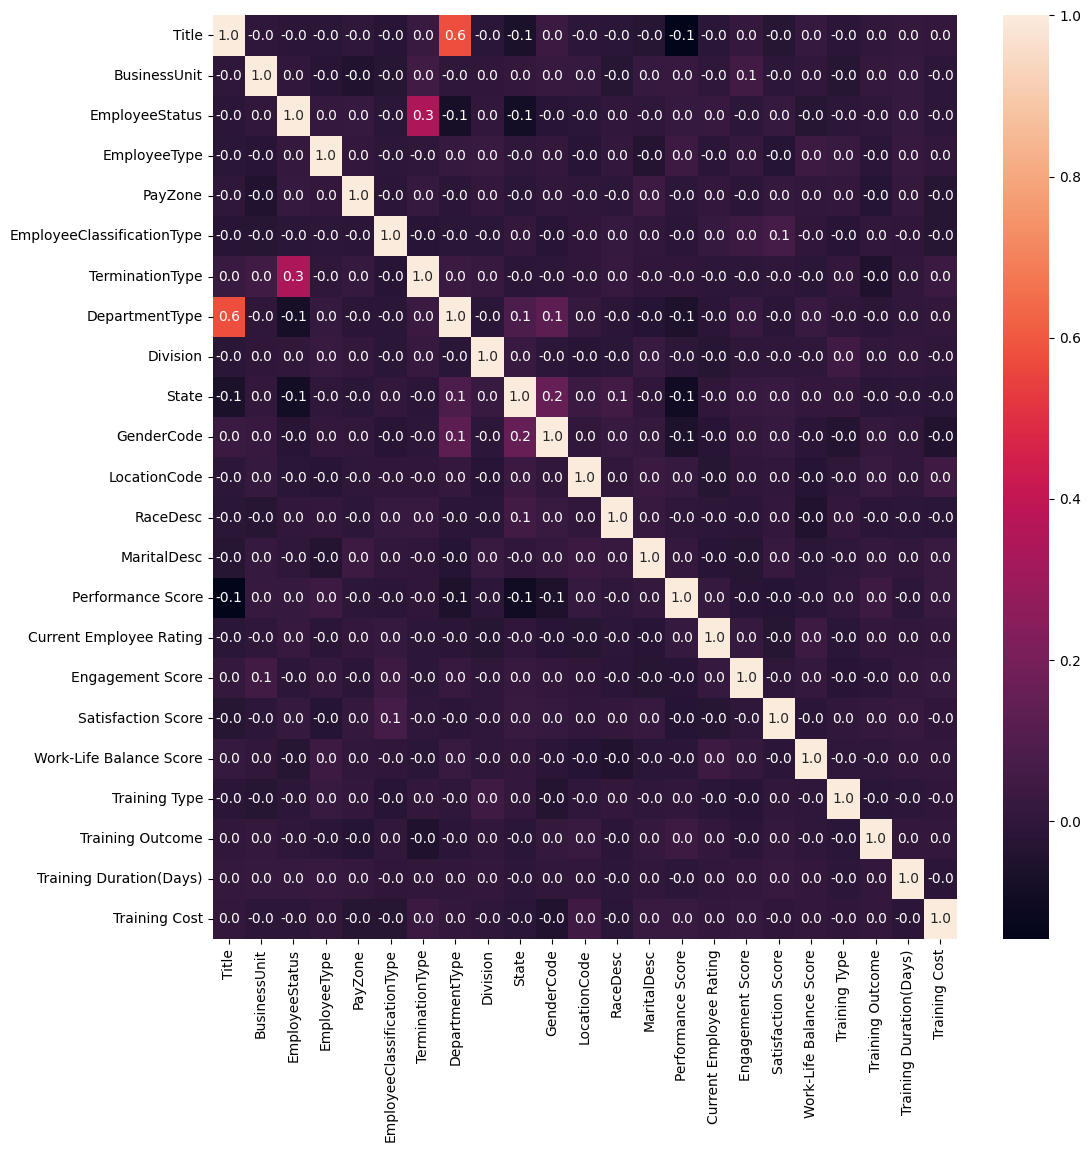

In [19]:
plt.figure(figsize= (12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f')
plt.show()

In [20]:
df.drop(columns=['Title'],inplace=True)

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

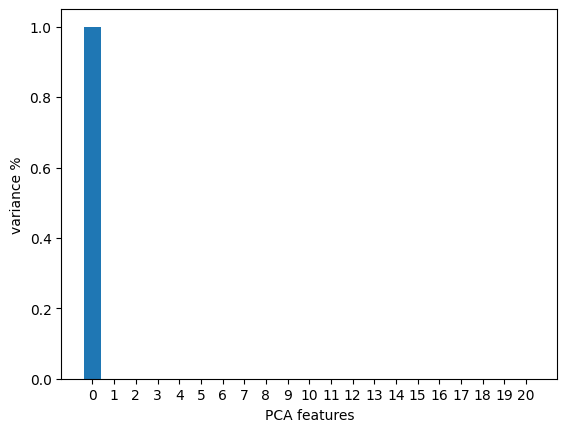

In [22]:
pca = PCA()
pca.fit(df.drop(columns=['Performance Score']))

var = pca.explained_variance_ratio_
plt.bar(list(range(var.shape[0])),var)
feature = range(pca.n_components_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(feature)
plt.show()

In [23]:
X = df.drop(columns=['Performance Score'])
y = df['Performance Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 10)

In [24]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(list(y_test), list(y_pred))
print('accuracy score : ',accuracy)

accuracy score :  0.7746031746031746


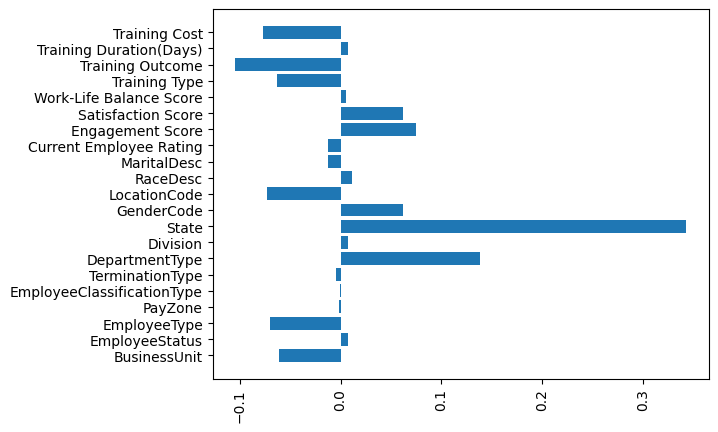

In [25]:
importance = model.named_steps['logisticregression'].coef_[0]
#for i,v in zip(X_train.columns, importance):
#    print(f'Feature: {i}, Score: {v}')

plt.barh(X_train.columns, importance, )
plt.xticks(rotation=90)
plt.show()

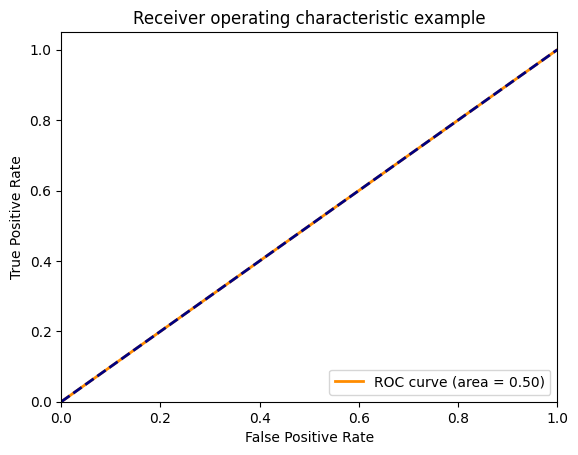

In [26]:
y_test_binary_multiclass = label_binarize(y_test, classes=y_test.unique())
y_pred_binary_multiclass = label_binarize(y_pred, classes=y_test.unique())

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.nunique()):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary_multiclass[:, i], y_pred_binary_multiclass[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary_multiclass.ravel(), y_pred_binary_multiclass.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [27]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(list(y_test), list(y_pred))
print(f"Accuracy: {accuracy}")

Accuracy: 0.7851851851851852


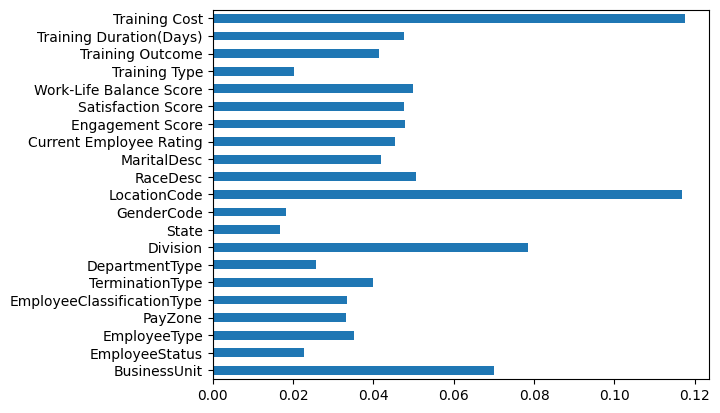

In [28]:
feat_importances = pd.Series(model.named_steps['randomforestclassifier'].feature_importances_, 
                             index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

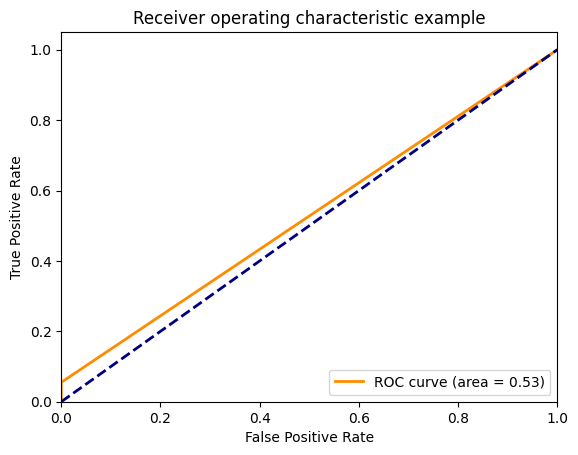

In [29]:
y_test_binary_multiclass = label_binarize(y_test, classes=y_test.unique())
y_pred_binary_multiclass = label_binarize(y_pred, classes=y_test.unique())

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.nunique()):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary_multiclass[:, i], y_pred_binary_multiclass[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary_multiclass.ravel(), y_pred_binary_multiclass.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [30]:
model = make_pipeline(StandardScaler(), GradientBoostingClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(list(y_test), list(y_pred))
print(f"Accuracy: {accuracy}")

Accuracy: 0.7767195767195767


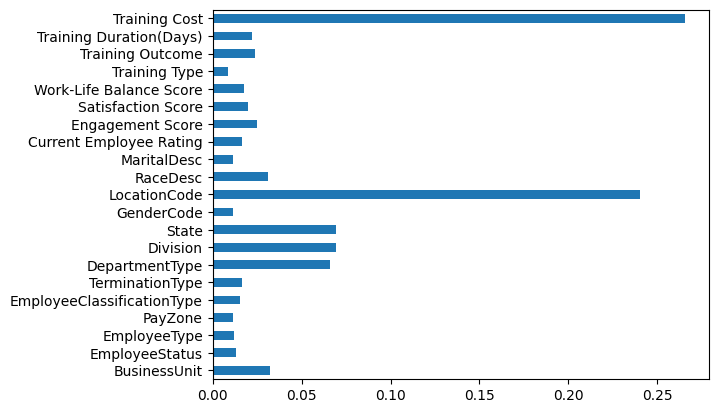

In [31]:
feat_importances = pd.Series(model.named_steps['gradientboostingclassifier'].feature_importances_, 
                             index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

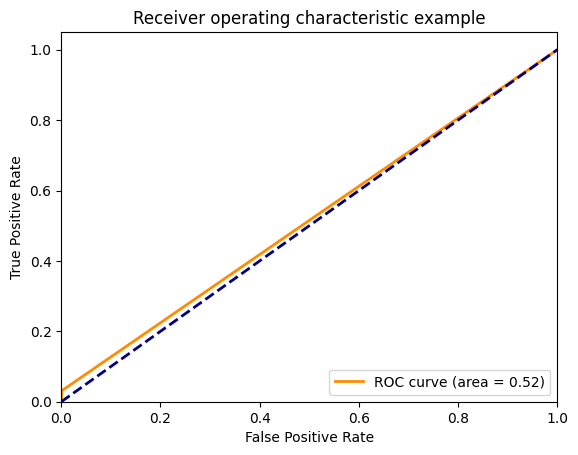

In [32]:
y_test_binary_multiclass = label_binarize(y_test, classes=y_test.unique())
y_pred_binary_multiclass = label_binarize(y_pred, classes=y_test.unique())

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test.nunique()):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary_multiclass[:, i], y_pred_binary_multiclass[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary_multiclass.ravel(), y_pred_binary_multiclass.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [33]:
scores = cross_val_score(LogisticRegression(penalty='l2',max_iter=100), df.drop(columns=['Performance Score']), df['Performance Score'], cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.79 accuracy with a standard deviation of 0.00


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [34]:
scores = cross_val_score(RandomForestClassifier(), df.drop(columns=['Performance Score']), df['Performance Score'], cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.80 accuracy with a standard deviation of 0.01


In [35]:
scores = cross_val_score(GradientBoostingClassifier(), df.drop(columns=['Performance Score']), df['Performance Score'], cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.00
